<a href="https://colab.research.google.com/github/CrisztinaZudor/Outlier-Detection/blob/main/OutlierDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outlier Detection



### This project evaluates three key methods: Empirical Covariance, Robust Covariance (MCD), and One-Class Support Vector Machine (OCSVM), using the Wine dataset

Import necessary libraries for modeling and plotting:

In [23]:
from sklearn.covariance import EllipticEnvelope
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import OneClassSVM
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

Create a dictionary of estimators with their specific configurations for outlier detection:

In [24]:
estimators = {
    # Empirical Covariance method - sensitive to outliers.
    # 'support_fraction=1.0' implies using all data points which can be skewed by outliers.
    # 'contamination=0.25' indicates an expected 25% of data points are outliers, based on domain knowledge.
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),

    # Robust Covariance (MCD) - reduces the effect of outliers by considering the smallest covariance determinant.
    # 'contamination' parameter is used for assuming 25% of data are outliers.
    "Robust Covariance (MCD)": EllipticEnvelope(contamination=0.25),

    # One-Class SVM - manage the trade-off between the boundary and the outliers.
    # 'nu=0.25' indicates the proportion of outliers in the dataset.
    # 'gamma=0.35' controls the kernel coefficient affecting the decision boundary shape.
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}

# First Analysis:

Using 'ash' and 'malic_acid' variables which present a simpler, clustered distribution. <br>
This analyse demonstrates the algorithms' effectiveness in identifying outliers within structured data.<br>

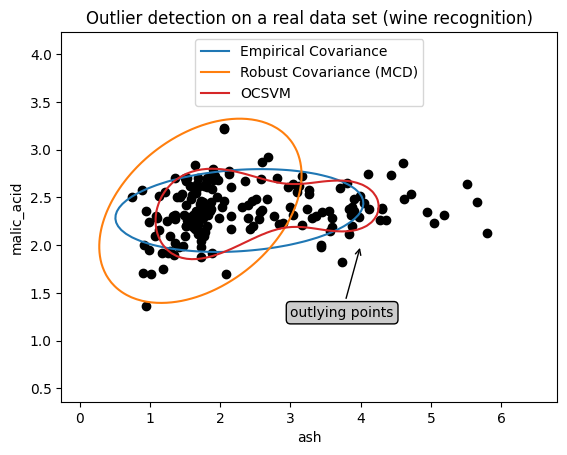

In [28]:
X = load_wine()["data"][:, [1, 2]]  # Subset of the dataset

# Create a new figure and axis for plotting
fig, ax = plt.subplots()

# Define colors for different methods
colors = ["tab:blue", "tab:orange", "tab:red"]

# Initialize an empty list to store legend entries
legend_lines = []

# Loop through the methods (name, estimator) and colors to train models and plot decision boundaries
for color, (name, estimator) in zip(colors, estimators.items()):
    # Fit the current estimator to the data
    estimator.fit(X)

    # Plot the decision boundary using DecisionBoundaryDisplay
    DecisionBoundaryDisplay.from_estimator(
        estimator,  # The trained estimator
        X,  # Input data
        response_method="decision_function",  # Use decision function for contour
        plot_method="contour",  # Plot contours for decision boundaries
        levels=[0],  # Set contour levels; 0 indicates the boundary
        colors=color,  # Assign a specific color for this boundary
        ax=ax,  # Plot on the created axis
    )

    # Add a line representing this method to the legend
    legend_lines.append(mlines.Line2D([], [], color=color, label=name))

# Scatter plot of the original data points in black
ax.scatter(X[:, 0], X[:, 1], color="black")

# Define style for annotation box and arrow
bbox_args = dict(boxstyle="round", fc="0.8")  # Rounded box with light gray fill
arrow_args = dict(arrowstyle="->")  # Arrow style for annotation

# Add annotation to highlight outlying points
ax.annotate(
    "outlying points",  # Text to display
    xy=(4, 2),  # Coordinates of the point to annotate
    xycoords="data",  # Coordinate system for the point
    textcoords="data",  # Coordinate system for the text
    xytext=(3, 1.25),  # Position of the annotation text
    bbox=bbox_args,  # Styling for the annotation box
    arrowprops=arrow_args,  # Styling for the arrow
)

# Add legend to the plot using the created legend entries
ax.legend(handles=legend_lines, loc="upper center")

# Set labels and title for the plot
_ = ax.set(
    xlabel="ash",  # Label for the x-axis
    ylabel="malic_acid",  # Label for the y-axis
    title="Outlier detection on a real data set (wine recognition)",  # Plot title
)

## Results:
Empirical Covariance (Blue): Influenced by outliers, leading to distorted boundaries. <br>
Robust Covariance (Orange): Successfully identifies primary clusters despite outliers.<br>
OCSVM (Red): Captures complex structures with flexible modeling.<br>

# Second Analysis:

Using 'flavanoids' and 'color_intensity' variables which present a banana-shaped, non-linear distribution. <br>
This analyse tests algorithms' capability in handling complex patterns.<br>

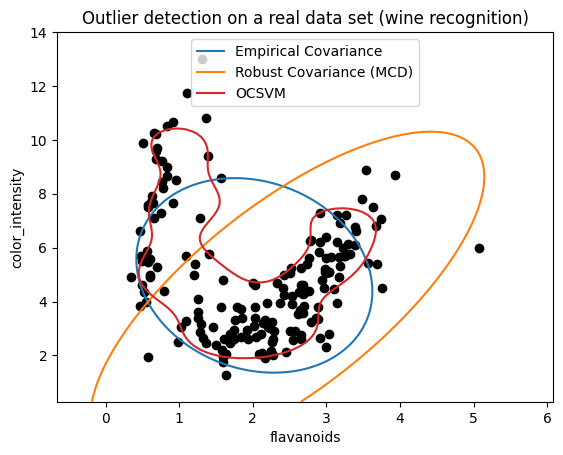

In [29]:
X = load_wine()["data"][:, [6, 9]]  # Subset of the Wine dataset for 2D analysis

# Create a new figure and axis for plotting
fig, ax = plt.subplots()

# Define colors for the decision boundaries of different methods
colors = ["tab:blue", "tab:orange", "tab:red"]

# Initialize an empty list to store legend lines for each method
legend_lines = []

# Loop through each outlier detection method, fit the estimator, and plot the decision boundaries
for color, (name, estimator) in zip(colors, estimators.items()):
    # Train the estimator on the selected features
    estimator.fit(X)

    # Plot the decision boundary for the current estimator
    DecisionBoundaryDisplay.from_estimator(
        estimator,  # The trained outlier detection model
        X,  # Input data
        response_method="decision_function",  # Use the decision function to draw contours
        plot_method="contour",  # Contour lines for decision boundaries
        levels=[0],  # Contour level for separating boundary
        colors=color,  # Assign a specific color to the decision boundary
        ax=ax,  # Plot on the current axis
    )
    # Add a line representing this method to the legend
    legend_lines.append(mlines.Line2D([], [], color=color, label=name))

# Scatter plot of the data points (shown in black) for visualization
ax.scatter(X[:, 0], X[:, 1], color="black")

# Add a legend to the plot using the created legend lines
ax.legend(handles=legend_lines, loc="upper center")

# Set labels for the axes and add a title to the plot
ax.set(
    xlabel="flavanoids",  # Label for the x-axis
    ylabel="color_intensity",  # Label for the y-axis
    title="Outlier detection on a real data set (wine recognition)",  # Plot title
)

# Display the final plot
plt.show()


## Results:
Empirical Covariance (Blue): Limited adaptability, showing poor boundary fit in complex structures. <br>
Robust Covariance (Orange): Effectively identifies the main data mode but struggles with non-linear patterns.<br>
OCSVM (Red): Accurately captures banana-shaped distribution, excelling in non-linear data modeling.<br>

# Conclusion
Empirical covariance provides a foundational approach but is sensitive to outliers. <br>
Robust covariance (MCD) offers greater resilience by focusing on core data clusters.<br>
One-Class SVM excels in handling complex, non-linear patterns. <br>